# Recommendation system 1


Based on the idea of knn

## Code for Recommendation System

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def change(s):
  t=set(s[1:-1].split(", "))
  return t
# Use class to make the system
class recommend_system:

# favorite is the favorite anime the new user select, we would get this in the following inputfavorite method
# alist is the data set we use to find the similar users, it's called userlist. The path of this dataset is the only argument we need
# recommendlist is the final recommand anime we got
  def __init__(self,path):
    self.favorite=set()
    self.alist=pd.read_csv(path)
    self.recommendlist=pd.DataFrame()
    self.alist['animelist']=self.alist['animelist'].apply(change)
    self.knn=60

# Get the new user's favorite anime. Take int as input
  def inputfavorite(self):
    favorite = []
    s = input('Please input your favorite anime id:')
    while s != '-1':
      self.favorite.add(s)
      s = input('Please input more anime id (type -1 to  stop):')
    self.alist['jacdis'] = self.alist['animelist'].apply(self.distance)
    self.recommend = self.alist
    self.alist.sort_values('jacdis', ascending=False, inplace=True)
    self.alist.reset_index(drop=True,inplace=True)

# Distance calculating functions we use to determine which are the similar users
  def distance(self,y):
    return 2*len(self.favorite & y)/(len(self.favorite)+len(self.favorite | y))

# Output method of our recommendation system. 
# Select the most similar users in the dataset and get the intersection of their favorite list
# The intersection is the result and every time we only print 3 of them.
  def recommendation(self):
    k_in_knn=self.knn
    self.recommenddict=dict()
    for i in range(0,k_in_knn):
      for id in self.alist['animelist'][i]:
        try:
          self.recommenddict[id]+=1
        except:
          self.recommenddict[id]=1
    for id in self.favorite:
      try:
        del self.recommenddict[id]
      except:
        pass
    self.recommendlist=pd.DataFrame(data=self.recommenddict,index=['Recommend Ratio']).T
    self.recommendlist['Recommend Ratio']=self.recommendlist['Recommend Ratio']/k_in_knn
    self.recommendlist.sort_values('Recommend Ratio',ascending=False,inplace=True)
    print(self.recommendlist)
  def tranfer(self):
    self.anime_name=pd.read_csv('/content/drive/MyDrive/BA820 Project/anime.csv')
    self.anime_name=anime_name[['MAL_ID','Name','Score']]
    self.anime_name['MAL_ID'].astype('int64')
    self.recommand_name=self.recommendlist.merge(anime_name,how='inner',on='MAL_ID')

## Codle for Evaluation

In [94]:
def evaluate(klist):
  evaluation=recommend_system('/content/drive/MyDrive/BA820 Project/userlist.csv')
  data=pd.read_csv('/content/drive/MyDrive/BA820 Project/userlist.csv')
  data['animelist']=data['animelist'].apply(change)

  test=data.sample(n=10, replace=False,axis=0,random_state=830)
  train = data[~ data['user_id'].isin(test['user_id'])]

  test.index=test['user_id']
  train.index=train['user_id']
  average_score=dict()
  evaluation.alist=evaluation.alist[~ evaluation.alist['user_id'].isin(test['user_id'])]
  for k in klist:
    evaluation.knn=k
    socrelist=[]
    for i in test.index:
      l=list(t for t in test['animelist'][i])
      selectlist=set(l[0:10])
      testlist=set(l[10:])

      evaluation.favorite=selectlist
      evaluation.alist['jacdis'] = evaluation.alist['animelist'].apply(evaluation.distance)
      evaluation.recommend = evaluation.alist
      evaluation.alist.sort_values('jacdis', ascending=False, inplace=True)
      evaluation.alist.reset_index(drop=True,inplace=True)
      evaluation.recommendation()
      evaluation.recommendlist.reset_index(inplace=True)
      result=list(i for i in evaluation.recommendlist[0:10]['index'])
      score=0
      for i in result:
        if i in testlist:
          score+=1
      socrelist.append(score)
    average_score[k]=np.mean(socrelist)
  return average_score

# Evaluation

In [ ]:
klist=range(0,200,10)
score_list1=evaluate(klist)
data1=pd.DataFrame(score_list1,index=['Score']).T

Text(0, 0.5, 'Evaluation Score')

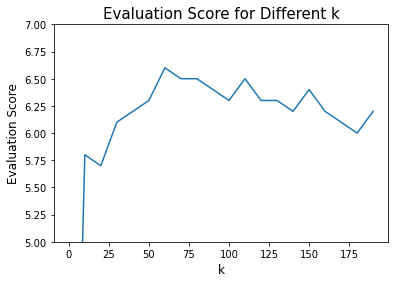

In [ ]:
plt.plot(data1)
plt.ylim(5,7)
plt.title('Evaluation Score for Different k',size=15)
plt.xlabel('k',size=12)
plt.ylabel('Evaluation Score',size=12)

# Example

In [95]:
re=recommend_system('/content/drive/MyDrive/BA820 Project/userlist.csv')

In [96]:
re.inputfavorite()

Please input your favorite anime id:35
Please input more anime id (type -1 to  stop):135
Please input more anime id (type -1 to  stop):35
Please input more anime id (type -1 to  stop):-1


In [97]:
re.recommendation()

       Recommend Ratio
121           0.883333
1535          0.516667
199           0.283333
2904          0.266667
1575          0.266667
...                ...
239           0.016667
2158          0.016667
11665         0.016667
3167          0.016667
208           0.016667

[340 rows x 1 columns]
